In [2]:
#LIBRARIES
import pandas as pd
import re
import numpy as np
import math

## FUZZY
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

## nomalice parameters
from unidecode import unidecode

import spacy  # For preprocessing
from scipy import spatial
from time import time  # To time our operations
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

## user to tranlate words

In [2]:

from deep_translator import GoogleTranslator
def translateString(to_translate, languageFinal):
    translated = GoogleTranslator(source='auto', target=languageFinal).translate(to_translate)
    return translated
def tranlateColum(dataFrame,columName,languageFinal):
    ## dataFrame Lengt
    total = dataFrame.shape[0]
    for i in range(0 ,total):
        to_translate = dataFrame[columName][i]
        translated = translateString(to_translate,languageFinal)
        print(i,translated)
        dataFrame[columName][i] = translated
    

## nfinal data base

In [ ]:

df = pd.read_excel("2_final_db.xlsx")


## se eliminan las perosonas sin job title 

In [ ]:

dfa = df[df["job_title"].notna()] 
dfa = dfa.reset_index(drop = True) 
dfa.shape[0]
dfa["job_title"][0]

## se traduce al ingles todo y se guarda en su propio archivo

In [ ]:

tranlateColum(dfa,"job_title","en")
dfa["job_title"][200]
dfa.to_excel("job_title_en.xlsx")

In [ ]:
# cuales del la db original tienen valoes nulos, por columna

df.isnull().sum()

# Se carga los job titles en ingles 

In [3]:
EN_DF = pd.read_excel("job_title_en.xlsx")
EN_DF.shape

(399, 38)

## Cleaning and lemmatization of the job titles

In [4]:
nlp = spacy.load("en_core_web_sm")

def cleaning(text):
    ##text = text.lower()
    #text = text.replace('[>/,\.!?\-!?\n\)\(\r]', ' ') 
    text = re.sub("[^A-Za-z']+", ' ', str(text))
    doc = nlp(text)
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    #txt = [token.lemma_ for token in doc if not token.is_stop]
    txt = [tok.lemma_.lower() for tok in doc
                if not tok.is_stop and not tok.is_punct and tok.is_alpha ]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    return txt


## loading word vectors+
 ## TO A python dic

In [5]:

embeddings_dict = {}
# vectors dimention
DIMENTION_DIC = 300
# 6 billions words
#with open("glove.6B."+str(DIMENTION_DIC)+"d.txt", 'r', encoding="utf-8") as f:
# 42 Billion words
with open("glove.42B."+str(DIMENTION_DIC)+"d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        print(word)
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

ney/redi-meds
stalwartuk
st-amant
stamp-size
stanchorage
s.t.a.n.d.
standord
starfox64
starle
starmind
star-san
starselite
starsports
starspow
starsshineonme
start/continue
start.html
starthtml
star-type
starvox
starwagon
stasso
state10
statec
statementlicense
state.now
state-reported
states10/10/2012
statesquick
statesthere
states.washington
state_type
stateview
stathams
station/bryan
stationthis
statkevich
statsanswersboardvideos
statti
stay-awake
staybeautiful
stboise
std100
stduluth
steamfunk
steapon
steece
steelers/ravens
steelroots
stefanibags.com
steinhour
stellenbosh
step.if
stepkother
stepo
stepsjoincontact
step-step
stepups
steri-fab
sterioids
sterlinglogin
sternn
steroided
stevn
stgc
sthd
stnto
stock11
stock.estimated
stockfinster
stockholme
stockpickers
stockpiler
stocks.com
stockwarning
stocs
stokeham
stoke-on
stolder
stommelen
stone-covered
stooop
stopgame
stop/limit
storandt
storesbusinesses
stormclan
störmer
storm-relative
storyfebruary
story?follow
storywriters
stossel

In [6]:
## ordena la spalabras dependiendo de la distancia euclidiana en el n-space
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

## method to get word/vector from dictionary
def getVectorWord(dictionary, word):
    if word in dictionary:
        return dictionary[word]
    else :
        return np.zeros(DIMENTION_DIC)


## se buscan las palabras mas cercanas 
### manager
### developer
### artist

In [7]:
print(find_closest_embeddings(embeddings_dict["manager"])[:10])
print(find_closest_embeddings(embeddings_dict["developer"])[:10])
print(find_closest_embeddings(embeddings_dict["artist"])[:10])

['manager', 'assistant', 'management', 'administrator', 'supervisor', 'coordinator', 'consultant', 'managers', 'director', 'managing']
['developer', 'developers', 'programmer', 'appsex-next', 'architect', 'development', 'consultant', 'opportunitiesjava', 'engineer', 'providersopen-source']
['artist', 'artists', 'musician', 'painter', 'art', 'playlistsalbum', 'artwork', 'sculptor', 'songwriter', 'works']


## word math, sumando vectores
### software + developer + ui
### software + developer + art
### software + developer - ui

In [8]:

print(find_closest_embeddings(embeddings_dict["software"] + embeddings_dict["developer"]+ embeddings_dict["ui"])[:7])
print(find_closest_embeddings(embeddings_dict["software"] + embeddings_dict["developer"]+ embeddings_dict["art"])[:7])
print(find_closest_embeddings(embeddings_dict["software"] + embeddings_dict["developer"]- embeddings_dict["ui"])[:7])

['software', 'developer', 'ui', 'developers', 'application', 'microsoft', 'java']
['software', 'developer', 'design', 'art', 'development', 'web', 'computer']
['software', 'developer', 'enterprise', 'solutions', 'microsoft', 'manager', 'consulting']


In [ ]:
print(find_closest_embeddings(embeddings_dict["hand"] + embeddings_dict["finger"]- embeddings_dict["ring"])[:7])

In [9]:
tsne = TSNE(n_components=2, random_state=0)
words =  list(["developer","front-end","sales","art","politics","math","calculator"])
vectors = [embeddings_dict[word] for word in words]

In [ ]:
Y = tsne.fit_transform(vectors[:100])
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

In [10]:
## tranform profiles to vectors
profilesVectors = []
for index in range(0,len(EN_DF['job_title'])):
    row = EN_DF['job_title'][index]
    cleaned = cleaning(row)
    nVectors = [np.zeros(DIMENTION_DIC)]
    if len(cleaned) > 0:
        nVectors  = [ getVectorWord(embeddings_dict,word) for word in cleaned]
    
        
    #print(len(nVectors),len(cleaned))
    sumVector = np.add.reduce(nVectors)
   
            
    #print(type(sumVector))
    profilesVectors.append(sumVector)

In [ ]:
len(profilesVectors)

In [ ]:
len(EN_DF['job_title'])


In [ ]:
print(find_closest_embeddings(profilesVectors[200])[1:9])
print(EN_DF.loc[200])

In [ ]:
print(find_closest_embeddings(profilesVectors[197])[1:9])
print(EN_DF.loc[197])


In [ ]:
## seleccionando el numero de categorias a mano
TOTAL_CATEGORIES = 10
kmeans = KMeans(n_clusters=TOTAL_CATEGORIES, random_state=0).fit(profilesVectors)

In [ ]:
for i in range(0,len(kmeans.cluster_centers_)):
    print(find_closest_embeddings(kmeans.cluster_centers_[i])[:5])

In [ ]:
len(embeddings_dict.keys())

In [ ]:
kmeans.labels_

In [ ]:
len(kmeans.labels_)

## routine to generate external file, to assing the relation OR/NOT to computer


In [11]:
## number of words needed to pass
MIN_COUNT = 2
## validates if is word related
def validator(relatedWords, words):
    isRelated = False
    count = 0
    for word in words:
        if word in relatedWords:
            count+=1
        if count >= MIN_COUNT: 
            return True
    if count >= MIN_COUNT: 
        return True
    else:
        return False

 



In [12]:
TOTAL_CLUSTERS = 12
dicC = {}
clusterTotal = np.zeros(len(EN_DF['job_title']))

related_words = ["software","development","engineer","web","developers","developer","engineering","technical","java","computer","microsoft","technology","programmer"]
for clust in range(2, TOTAL_CLUSTERS+1):
    kmeans = KMeans(n_clusters=clust, random_state=0).fit(profilesVectors)
    labels = kmeans.labels_
    relatedArray = []
    for index in range(0,len(kmeans.cluster_centers_)):
        words = find_closest_embeddings(kmeans.cluster_centers_[index])[:7]
        related = validator(related_words, words)
        print(index,related," - ",words)
        relatedArray.append(related)
    print(len(relatedArray),clust, len(clusterTotal))
    for proIndex in range(0,len(labels)):
        label = labels[proIndex]
        isRelated = relatedArray[label]
        if isRelated==True:
            print("isRelated")
            prev = clusterTotal[proIndex]
            clusterTotal[proIndex] = prev + 1
            print(prev,clusterTotal[proIndex])
    print("------------------------------------------\n")

lated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
3.0 4.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
1.0 2.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
1.0 2.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
1.0 2.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
3.0 4.0
isRelated
3.0 4.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 5.0
isRelated
4.0 

In [13]:
dta = {}
dta["total_clustering"]=clusterTotal
JOB_CLUS_DF = pd.DataFrame(data=dta)
print(JOB_CLUS_DF, JOB_CLUS_DF.shape)

     total_clustering
0                 1.0
1                 1.0
2                 1.0
3                 1.0
4                11.0
..                ...
394               1.0
395              10.0
396               1.0
397               1.0
398              11.0

[399 rows x 1 columns] (399, 1)


In [14]:
JOB_CLUS_DF.to_excel("index-by-cluster.xlsx",index=False)

In [15]:
import pylab as P

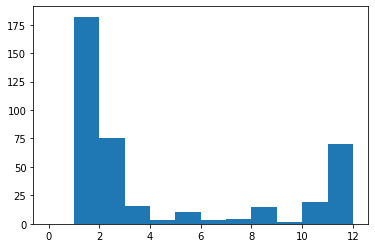

In [16]:
n, bins, patches = P.hist(clusterTotal,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12])
P.show()